In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/beyonce-track-attribute-data/beyonce_tracks.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data= pd.read_csv("/kaggle/input/beyonce-track-attribute-data/beyonce_tracks.csv")

In [4]:
data.head()

,artist_name,track_name,album_name,is_explicit,genres,release_date,track_id,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature
0,Beyoncé,I'M THAT GIRL,RENAISSANCE,True,"pop, r&b",2022-07-29,1MpCaOeUWhox2Fgigbe1cL,0.554,0.136,0.535,-8.959,0.061600,0.000013,0.1240,0.1860,5,105.865,0,208014,4
1,Beyoncé,COZY,RENAISSANCE,True,"pop, r&b",2022-07-29,0mKGwFMHzTprtS2vpR3b6s,0.556,0.367,0.630,-8.150,0.000828,0.004680,0.1550,0.1020,7,149.147,1,210372,5
2,Beyoncé,ALIEN SUPERSTAR,RENAISSANCE,True,"pop, r&b",2022-07-29,1Hohk6AufHZOrrhMXZppax,0.545,0.464,0.641,-6.398,0.004530,0.000066,0.1710,0.0998,10,121.892,0,215460,4
3,Beyoncé,CUFF IT,RENAISSANCE,True,"pop, r&b",2022-07-29,1xzi1Jcr7mEi9K2RfzLOqS,0.780,0.642,0.689,-5.668,0.036800,0.000010,0.0698,0.1410,7,115.042,1,225389,4
4,"Beyoncé, BEAM",ENERGY (feat. Beam),RENAISSANCE,False,"pop, r&b",2022-07-29,0314PeD1sQNonfVWix3B2K,0.903,0.587,0.519,-9.151,0.281000,0.000106,0.1550,0.2600,1,114.991,1,116727,4


In [5]:
data.tail()

,artist_name,track_name,album_name,is_explicit,genres,release_date,track_id,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature
331,"Beyoncé, JAY-Z",Crazy In Love (feat. Jay-Z),Crazy In Love (featuring Jay-Z),False,"pop, r&b",2003-05-20,19lLzX7vt4BhrSOaHeRyn7,0.656,0.700,0.767,-6.607,0.00248,0.000000,0.0688,0.2100,2,99.201,0,236120,4
332,Beyoncé,Work It Out - New Radio Edit,Work It Out,False,"pop, r&b",2002-06-17,3hBf0RhTUX3qKJFKaagnIg,0.674,0.960,0.838,-4.066,0.41700,0.000000,0.1890,0.2000,5,173.946,1,221773,4
333,"Beyoncé, Victor Calderone, Mac Quayle",Work It Out - Blow Your Horn Dub,Work It Out,False,"pop, r&b",2002-06-17,7t8C85BFp6CwB3PS8Wao1D,0.725,0.295,0.783,-6.275,0.00439,0.682000,0.1430,0.0537,11,129.976,0,597520,4
334,"Beyoncé, Azza",Work It Out - Azza's Nu Soul Mix,Work It Out,False,"pop, r&b",2002-06-17,4E82n1R43NJJ2M5A0I5IS1,0.552,0.740,0.728,-6.600,0.18400,0.000564,0.0868,0.3310,2,86.902,1,287200,4
335,"Beyoncé, Maurice Joshua",Work It Out - Maurice's Nu Soul Mix,Work It Out,False,"pop, r&b",2002-06-17,3iqTyC2c1sincQjj5t3Fdo,0.832,0.646,0.651,-6.926,0.00110,0.562000,0.3520,0.0490,5,126.013,0,430613,4


In [6]:
data.shape

(336, 20)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       336 non-null    object 
 1   track_name        336 non-null    object 
 2   album_name        336 non-null    object 
 3   is_explicit       336 non-null    bool   
 4   genres            336 non-null    object 
 5   release_date      336 non-null    object 
 6   track_id          336 non-null    object 
 7   danceability      336 non-null    float64
 8   valence           336 non-null    float64
 9   energy            336 non-null    float64
 10  loudness          336 non-null    float64
 11  acousticness      336 non-null    float64
 12  instrumentalness  336 non-null    float64
 13  liveness          336 non-null    float64
 14  speechiness       336 non-null    float64
 15  key               336 non-null    int64  
 16  tempo             336 non-null    float64
 1

In [8]:
data.describe()

,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.612640,0.490362,0.682492,-7.289720,0.138767,0.079687,0.305424,0.168143,5.181548,121.615961,0.651786,250289.229167,3.922619
std,0.155603,0.233648,0.189090,2.854806,0.219504,0.209146,0.265685,0.150844,3.568488,29.594229,0.477115,98478.940431,0.408814
min,0.143000,0.038800,0.045200,-27.432000,0.000066,0.000000,0.016200,0.027100,0.000000,66.930000,0.000000,16373.000000,1.000000
25%,0.508750,0.323000,0.557750,-8.451000,0.005295,0.000000,0.097200,0.053650,1.000000,97.076500,0.000000,200813.000000,4.000000
50%,0.635000,0.489500,0.715000,-6.750500,0.037200,0.000020,0.201000,0.106500,6.000000,123.015000,1.000000,228933.000000,4.000000
75%,0.725250,0.651000,0.821750,-5.446750,0.158000,0.005510,0.392750,0.254750,8.000000,136.039000,1.000000,278884.750000,4.000000
max,0.925000,0.971000,0.993000,-2.706000,0.994000,0.937000,0.983000,0.940000,11.000000,216.788000,1.000000,597520.000000,5.000000


# Check for any missing values

In [9]:
data.isnull().sum()

artist_name         0
track_name          0
album_name          0
is_explicit         0
genres              0
release_date        0
track_id            0
danceability        0
valence             0
energy              0
loudness            0
acousticness        0
instrumentalness    0
liveness            0
speechiness         0
key                 0
tempo               0
mode                0
duration_ms         0
time_signature      0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
duplicate_track=data['track_name'].duplicated(keep=False)
duplicate_track.sum()

84

In [12]:
if duplicate_track.sum()>0:
    df_duplicate_track=data[duplicate_track].sort_values(by='track_name')
    print(df_duplicate_track[['artist_name', 'track_name', 'album_name', 'release_date']])

                           artist_name               track_name  \
30   Beyoncé, Shatta Wale, Major Lazer                  ALREADY   
20   Beyoncé, Shatta Wale, Major Lazer                  ALREADY   
272       Beyoncé, Alejandro Fernández              Amor Gitano   
185       Beyoncé, Alejandro Fernández              Amor Gitano   
16                             Beyoncé                   BIGGER   
..                                 ...                      ...   
194                            Beyoncé                Suga Mama   
242                            Beyoncé             Sweet Dreams   
164                            Beyoncé             Sweet Dreams   
174                     Beyoncé, JAY-Z  Upgrade U (feat. Jay-Z)   
195                     Beyoncé, JAY-Z  Upgrade U (feat. Jay-Z)   

                                   album_name release_date  
30                    The Lion King: The Gift   2019-07-19  
20   The Lion King: The Gift [Deluxe Edition]   2020-07-31  
272         

In [13]:
df_duplicate_track.head()

,artist_name,track_name,album_name,is_explicit,genres,release_date,track_id,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature
30,"Beyoncé, Shatta Wale, Major Lazer",ALREADY,The Lion King: The Gift,False,"pop, r&b",2019-07-19,6tgEc2O1uFHcZDKPoo6PC8,0.647,0.548,0.732,-5.846,0.0846,0.0,0.597,0.0891,2,67.295,1,222529,3
20,"Beyoncé, Shatta Wale, Major Lazer",ALREADY,The Lion King: The Gift [Deluxe Edition],False,"pop, r&b",2020-07-31,1TSinFFcDJJzR6ErO81Y3c,0.671,0.543,0.755,-5.831,0.0876,0.0,0.429,0.0683,2,67.332,0,223422,3
272,"Beyoncé, Alejandro Fernández",Amor Gitano,Irreemplazable,False,"pop, r&b",2007-08-27,2N1D0rf5uu3kYLxgEXWB8E,0.390,0.627,0.758,-5.687,0.4570,0.0,0.188,0.3220,4,168.128,0,228413,4
185,"Beyoncé, Alejandro Fernández",Amor Gitano,B'Day Deluxe Edition,False,"pop, r&b",2007-05-29,1Kd5Qj9kicqjCw1BjWRzH0,0.491,0.596,0.745,-5.631,0.4730,0.0,0.239,0.2540,4,167.875,0,228413,4
16,Beyoncé,BIGGER,The Lion King: The Gift [Deluxe Edition],False,"pop, r&b",2020-07-31,0gdOcxvPU37ADE7vPkgQsv,0.509,0.181,0.360,-8.200,0.6330,0.0,0.130,0.0361,5,129.624,0,226361,4


In [14]:
data.drop(['track_id'],axis=1,inplace=True)

In [15]:
data.head()

,artist_name,track_name,album_name,is_explicit,genres,release_date,danceability,valence,energy,loudness,acousticness,instrumentalness,liveness,speechiness,key,tempo,mode,duration_ms,time_signature
0,Beyoncé,I'M THAT GIRL,RENAISSANCE,True,"pop, r&b",2022-07-29,0.554,0.136,0.535,-8.959,0.061600,0.000013,0.1240,0.1860,5,105.865,0,208014,4
1,Beyoncé,COZY,RENAISSANCE,True,"pop, r&b",2022-07-29,0.556,0.367,0.630,-8.150,0.000828,0.004680,0.1550,0.1020,7,149.147,1,210372,5
2,Beyoncé,ALIEN SUPERSTAR,RENAISSANCE,True,"pop, r&b",2022-07-29,0.545,0.464,0.641,-6.398,0.004530,0.000066,0.1710,0.0998,10,121.892,0,215460,4
3,Beyoncé,CUFF IT,RENAISSANCE,True,"pop, r&b",2022-07-29,0.780,0.642,0.689,-5.668,0.036800,0.000010,0.0698,0.1410,7,115.042,1,225389,4
4,"Beyoncé, BEAM",ENERGY (feat. Beam),RENAISSANCE,False,"pop, r&b",2022-07-29,0.903,0.587,0.519,-9.151,0.281000,0.000106,0.1550,0.2600,1,114.991,1,116727,4


In [16]:
#data wrangling
data['release_date']=pd.to_datetime(data['release_date'])

In [17]:
data['release_date']

0     2022-07-29
1     2022-07-29
2     2022-07-29
3     2022-07-29
4     2022-07-29
         ...    
331   2003-05-20
332   2002-06-17
333   2002-06-17
334   2002-06-17
335   2002-06-17
Name: release_date, Length: 336, dtype: datetime64[ns]

# Distribution of numerical features

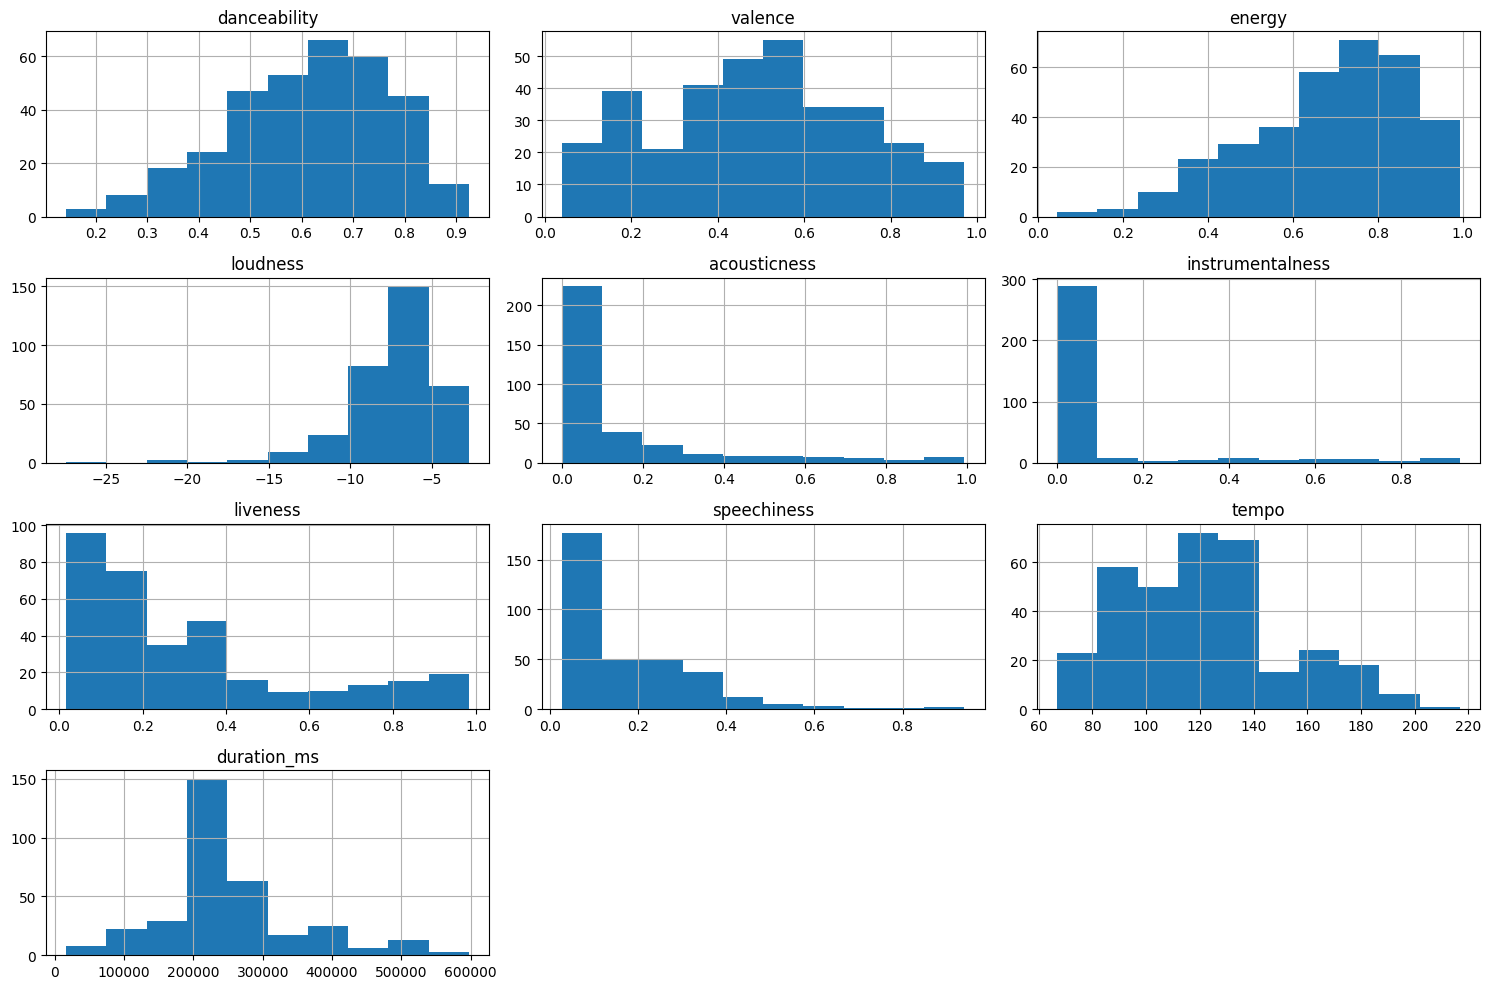

In [18]:
num_cols= ['danceability', 'valence', 'energy', 'loudness', 'acousticness', 
            'instrumentalness', 'liveness', 'speechiness', 'tempo', 'duration_ms']
data[num_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

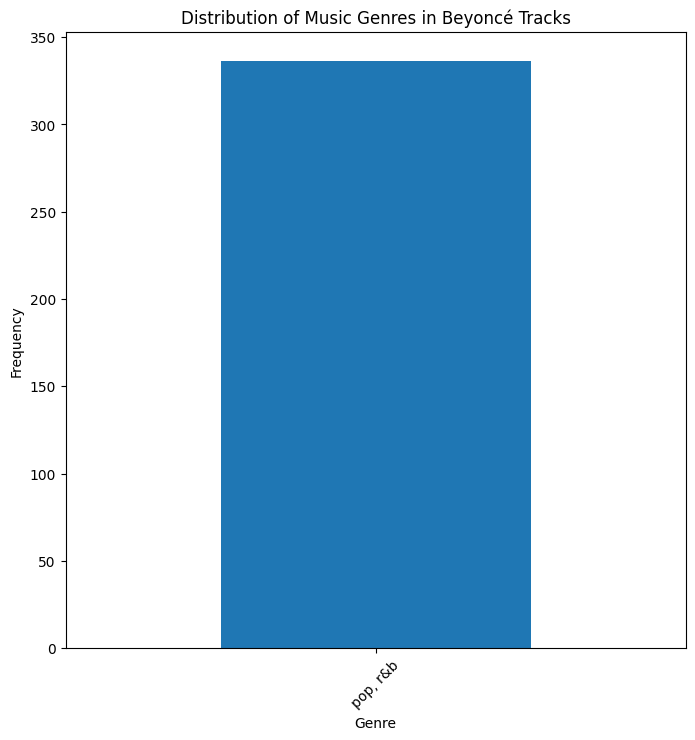

In [19]:
genre= data['genres'].value_counts()
plt.figure(figsize=(8,8))
genre.plot(kind='bar')
plt.title('Distribution of Music Genres in Beyoncé Tracks')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

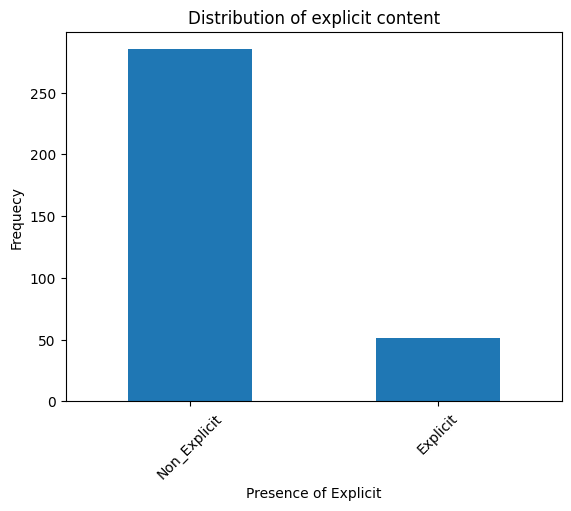

In [20]:
explicit_counts=data['is_explicit'].value_counts()
explicit_counts.plot(kind='bar')
plt.title("Distribution of explicit content")
plt.xlabel("Presence of Explicit")
plt.ylabel("Frequecy")
plt.xticks([0,1],['Non_Explicit','Explicit'],rotation=45)
plt.show()
